this program shows the 2-d and 3-d tsne plot of DICE which is a state of art number embedding method

In [ ]:
import sys
import os
path_father = os.path.abspath(r'..')
path_father
# sys.path.append(path_father)

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import math
import numpy as np

%matplotlib inline

In [11]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [12]:
class DICE:
    '''
    DICE class turns numbers into their respective DICE embeddings
    
    Since the cosine function decreases monotonically between 0 and pi, simply employ a linear mapping
    to map distances s_n \in [0, |a-b|] to angles \theta \in [0, pi]
    '''
    def __init__(self, d=2, min_bound=0, max_bound=100, norm="l2"):
        self.d = d # By default, we build DICE-2
        self.min_bound = min_bound
        self.max_bound = max_bound
        self.norm = norm  # Restrict x and y to be of unit length
        self.M = np.random.normal(0, 1, (self.d, self.d))
        self.Q, self.R = np.linalg.qr(self.M, mode="complete")  # QR decomposition for orthonormal basis, Q
    
    def __linear_mapping(self, num):
        '''Eq. (4) from DICE'''
        norm_diff = num / abs(self.min_bound - self.max_bound)
        theta = norm_diff * math.pi
        return theta
    
    def make_dice(self, num):
        r = 1
        theta = self.__linear_mapping(num)
        if self.d == 2:
            # DICE-2
            polar_coord = np.array([r*math.cos(theta), r*math.sin(theta)])
        elif self.d > 2:
            # DICE-D
            polar_coord = np.array([math.sin(theta)**(dim-1) * math.cos(theta) if dim < self.d else math.sin(theta)**(self.d) for dim in range(1, self.d+1)])
        else:
            raise ValueError("Wrong value for `d`. `d` should be greater than or equal to 2.")
            
        dice = np.dot(self.Q, polar_coord)  # DICE-D embedding for `num`
        
        # return dice.tolist()
        return dice

In [13]:
dice = DICE(d=100, min_bound=0, max_bound=2000)
embedding_matrix=np.zeros((1000, 100))
for i in range(0,1000):
    embedding_matrix[i]=dice.make_dice(i)

In [14]:
embeddings_tSNE = TSNE(n_components=3).fit_transform(embedding_matrix)
embeddings_tSNE = pd.DataFrame(embeddings_tSNE, columns=['tSNE_1', 'tSNE_2','tSNE_3'])
embeddings_tSNE['magnitude'] = [i for i in range(0,1000)]
embeddings_tSNE

/home/egbert_jing/anaconda3/envs/4222G18/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/egbert_jing/anaconda3/envs/4222G18/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


,tSNE_1,tSNE_2,tSNE_3,magnitude
0,5.432852,7.980364,11.469649,0
1,5.453611,7.976509,11.426849,1
2,5.493240,7.977419,11.380780,2
3,5.536461,7.932772,11.346748,3
4,5.426486,7.763694,11.274920,4
...,...,...,...,...
995,8.279953,0.643424,-9.484078,995
996,8.268471,0.538262,-9.590576,996
997,8.361388,0.552386,-9.568053,997
998,8.411962,0.548733,-9.587600,998


In [15]:
fig = plt.figure(figsize=(100,100))
ax = fig.add_subplot(projection='3d')
x1=embeddings_tSNE.tSNE_1
y1=embeddings_tSNE.tSNE_2
z1=embeddings_tSNE.tSNE_3
#ax.plot(x1, y1, z1)
ax.scatter(x1, y1, z1, c=z1, marker='^',s=1000)
plt.show()

In [16]:
embeddings_tSNE = TSNE(n_components=2).fit_transform(embedding_matrix)
embeddings_tSNE = pd.DataFrame(embeddings_tSNE, columns=['tSNE_1', 'tSNE_2'])
embeddings_tSNE['magnitude'] = [i for i in range(0,1000)]
embeddings_tSNE[:10]

/home/egbert_jing/anaconda3/envs/4222G18/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
/home/egbert_jing/anaconda3/envs/4222G18/lib/python3.7/site-packages/sklearn/neighbors/base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')


,tSNE_1,tSNE_2,magnitude
0,-30.822668,-32.044510,0
1,-30.803982,-32.115986,1
2,-30.917917,-32.418133,2
3,-30.876556,-32.497200,3
4,-30.420153,-32.118618,4
5,-30.291981,-32.167240,5
6,-30.208235,-32.237175,6
7,-30.590681,-32.770149,7
8,-30.548008,-32.867710,8
9,-30.455866,-32.926411,9


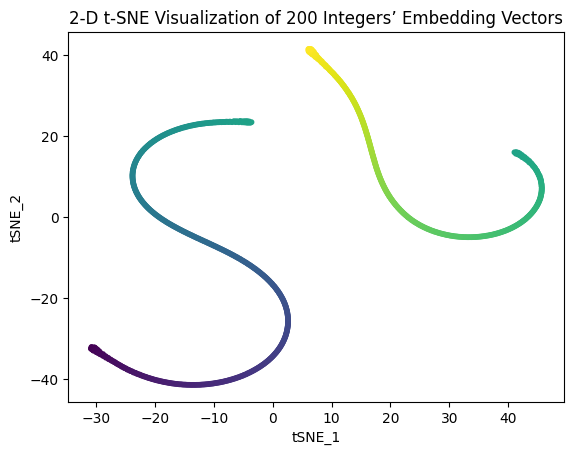

In [17]:
plt.scatter(embeddings_tSNE.tSNE_1, embeddings_tSNE.tSNE_2,  c=embeddings_tSNE.magnitude, s=10)
plt.title('2-D t-SNE Visualization of 200 Integers’ Embedding Vectors')
plt.xlabel('tSNE_1')
plt.ylabel('tSNE_2')
plt.show()

In [18]:
np.save(path_father + "/embedding/dice.npy",embedding_matrix)